In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10) # this sets all the figures drawn to 10,20

In [2]:
df1 = pd.read_csv("datasets/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
# We need to count the number of area_type so we will use groupby

df1.groupby('area_type')['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# Let's drop some colums which do not make a vote in pricing of an apartment

df2 = df1.drop(["area_type", "availability", "society"], axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2['balcony'] = df2['balcony'].fillna(round(df2['balcony'].mean()))
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
# now that the all values are not null we are ready to move on
# Let's see the size column which says 3BHK in some rows while 4 bedroom in somes.
# As the both are one and the same thing
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# To get rid of this problem we will create an another column named bhk 
df3['bhk'] = df3['size'].apply(lambda x: int(x.split()[0]))

<ipython-input-11-fc491f6abaad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split()[0]))


In [12]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [14]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def isFloat(n):
    try:
        float(n)
    except:
        return False
    return True

In [16]:
# Now there are some values in range so we can convert it into mean of those two values
df3[~df3['total_sqft'].apply(lambda x: isFloat(x))].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [17]:
def convert_to_float(n):
    try:
        new = n.split('-')
        return (float(new[0]) + float(new[1]))/2
    except:
        try:
            return float(n)
        except:
            return None
convert_to_float('3090 - 5002')    

4046.0

In [18]:
df4 = df3.copy()

In [19]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_to_float)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [20]:
# Now we will be looking into dimensionality reduction techniques and Feature Engineering

In [21]:
# This is feature engineering
# price per sq ft is important in real estate market so we will create a column named price per sq ft
df5 = df4.copy() # This is the deep copy 
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [22]:
df5['location'].nunique()  

1304

In [23]:
# as there are so many unique locations so we cannot use dummies cause then we will have around 1300 columns
# So there is concept called dimensionality reduction or curse which we will use here 
# the location with less rows will be set in the column called others

# So to check the number of rows for each location is done as follows

In [24]:
df5['location'] = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(10)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [25]:
type(location_stats) # as location stats is series we can do series operations on it
location_stats.unique()

array([535, 392, 304, 266, 236, 210, 186, 176, 175, 171, 152, 150, 149,
       141, 131, 106,  98,  96,  88,  87,  85,  84,  81,  79,  74,  73,
        72,  70,  68,  67,  66,  64,  63,  62,  60,  58,  57,  54,  53,
        52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,
        39,  38,  37,  36,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [26]:
len(location_stats[location_stats<=10])

1052

In [27]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [28]:
df5.location.nunique() # So there is difference between the first nunique and second unique because there were some names which 
# were like same but had unwanted space which was removed by using strip
# so now they are same

1293

In [29]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [30]:
df5.location.nunique() # Now we only have 242 columns

242

## Now we are going to do outlier detection and removal

In [31]:
# see like if u have say like 1000 sqft home then u cannot have more than 3 bedrooms as we see in the dataframe above right
# there will be some outliers in every dataframe you need to take care about 
# let's say the threshold for a bedroom is 300, we are going to see some of the outliers now
df5[(df5.total_sqft/df5.bhk)<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [32]:
df5.shape

(13246, 8)

In [33]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [34]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
# So now there are very large prices for per sqft it can be possible for some places but we are making a generic model so we will
# let them out 
# And again we have to like groupby location and then see per location the prices 
# formula for standard deviation is 
# step 1: find mean
# step 2: For each data point, find the square of its distance to the mean.
# Step 3: Sum the values from Step 2. 
# Step 4: Divide by the number of data points.
# Step 5: Take the square root.
def remove_pl_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        avg = np.mean(subdf.price_per_sqft) # first step
        std = np.std(subdf.price_per_sqft)  # we got std
        reduced_df = subdf[(subdf.price_per_sqft>(avg-std)) & (subdf.price_per_sqft<=(std+avg))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [36]:
df7 = remove_pl_outliers(df6)
df7.shape
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


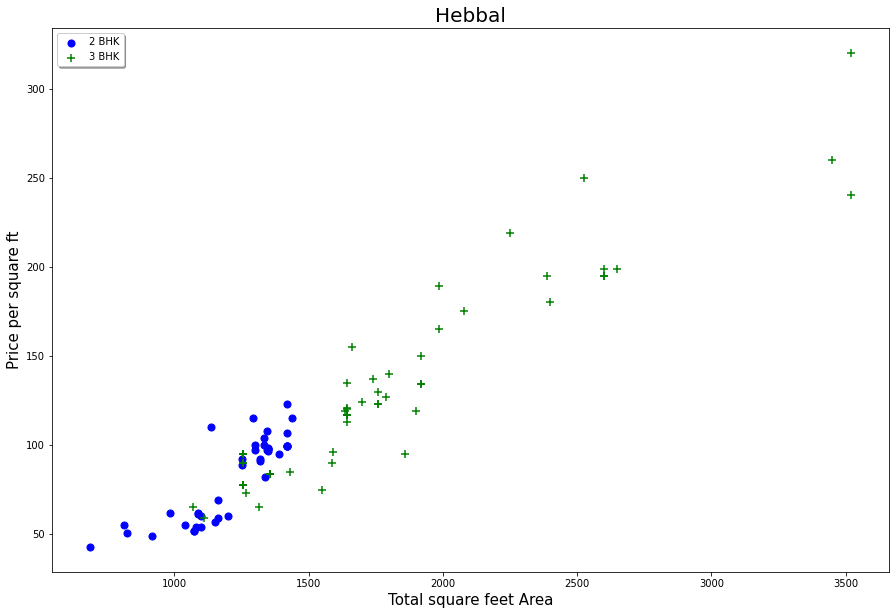

In [37]:
import matplotlib.pyplot as plt

def plot_scatter_plot(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', marker='+', s=50)
    plt.xlabel("Total square feet Area", fontsize=15)
    plt.ylabel("Price per square ft", fontsize=15)
    plt.legend(shadow=True)
    plt.title(location, fontsize=20)

plot_scatter_plot(df7, "Hebbal")

In [38]:
bhk2 = df7[df7.location == 'Rajaji Nagar'][df7.bhk==2] # we can also use this
bhk2.head()

<ipython-input-38-2d2324ff6fcc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = df7[df7.location == 'Rajaji Nagar'][df7.bhk==2] # we can also use this


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5737,Rajaji Nagar,2 BHK,1370.0,2.0,1.0,170.0,2,12408.759124
5740,Rajaji Nagar,2 BHK,1718.0,3.0,2.0,288.0,2,16763.678696
5743,Rajaji Nagar,2 Bedroom,1200.0,2.0,0.0,150.0,2,12500.000000
5744,Rajaji Nagar,2 Bedroom,1160.0,1.0,0.0,163.0,2,14051.724138
5746,Rajaji Nagar,2 BHK,1440.0,2.0,2.0,170.0,2,11805.555556


In [39]:
df7.shape

(10241, 8)

In [40]:
# We have to remove those datapoints whose 2bhk rates are lower then the mean of 1bhk apartment

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


df8 = remove_bhk_outliers(df7)

In [41]:
df8.shape

(7329, 8)

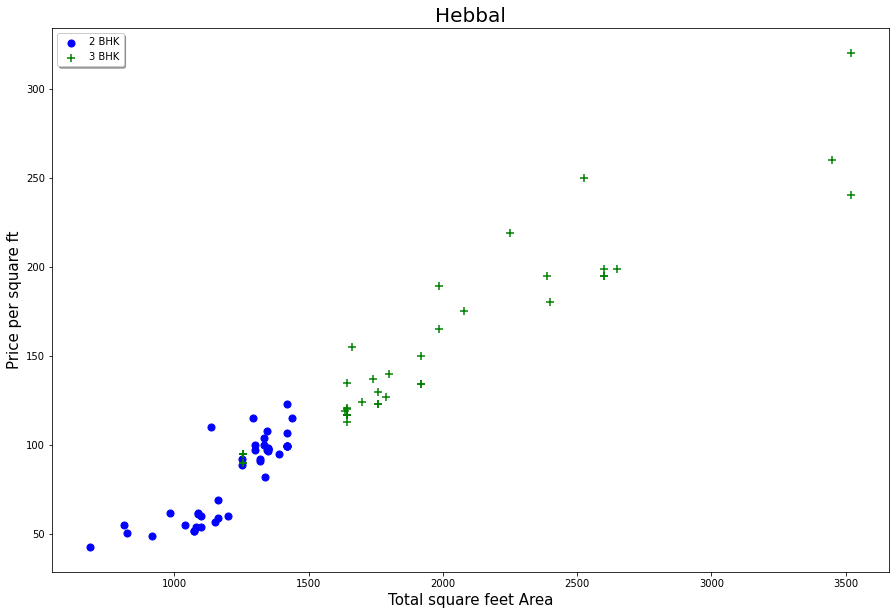

In [42]:
plot_scatter_plot(df8,"Hebbal")

Text(0, 0.5, 'Count')

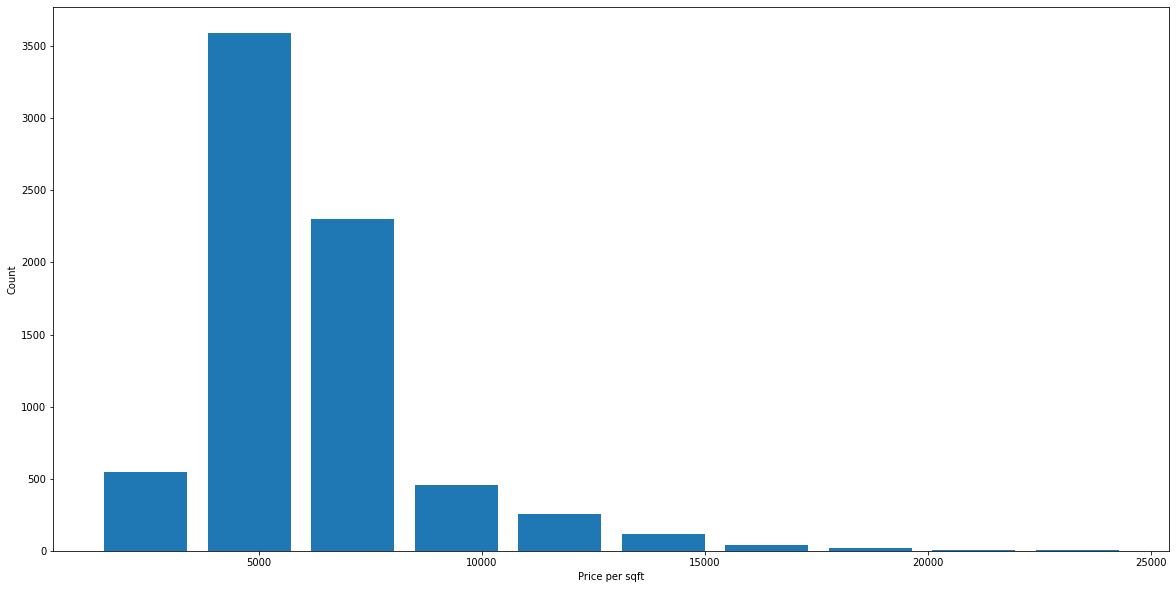

In [47]:
# I want to find how many sqft area properties i have so let's plot
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel("Count")

In [50]:
# Now we have to deal with bathroom criteria 
# there are places which have like 13 bathrooms
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

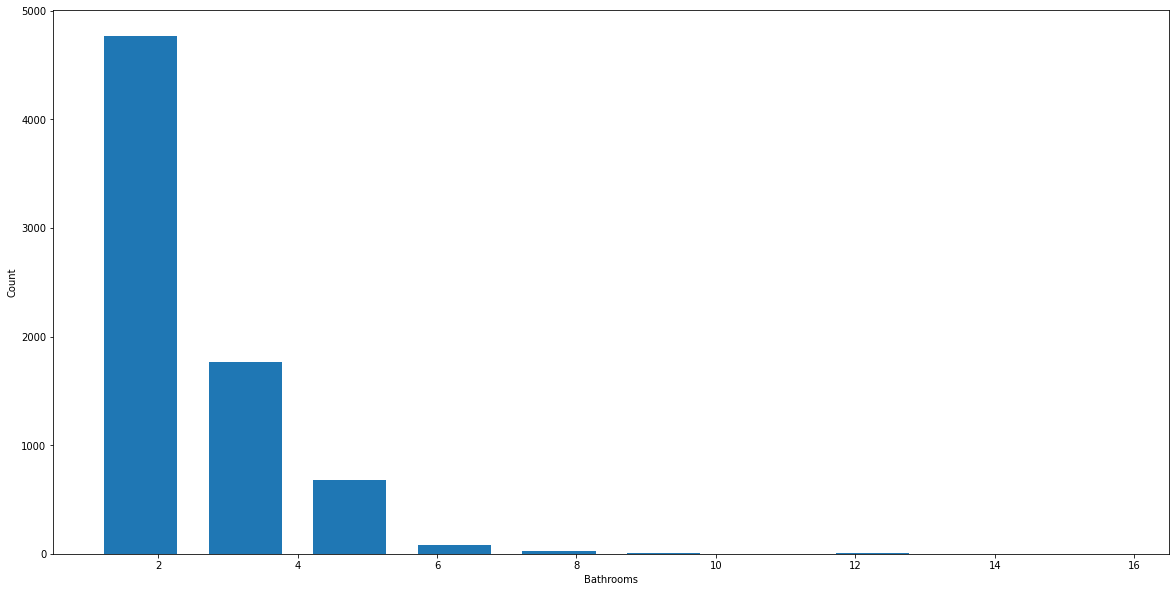

In [51]:
plt.hist(df8.bath, rwidth=0.7)
plt.xlabel("Bathrooms")
plt.ylabel("Count")
# So max number of places are having 2 bathrooms

In [55]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [56]:
# we should remove those kind of data
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [58]:
df10 = df9.drop(['size', 'price_per_sqft','balcony'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Model Building 

In [59]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df12 = df11.drop("location", axis=1) # 1 means columns
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X = df12.drop("price", axis=1)
y = df12['price']

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [69]:
from sklearn.linear_model import LinearRegression, Lasso

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874424

In [70]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv).mean()

0.8183540750696003

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


def find_the_best_regressor_model(X, y):
    algos = {
        'LinearRegression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse', 'friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_the_best_regressor_model(X, y)

,model,best_score,best_params
0,LinearRegression,0.818354,{'normalize': False}
1,lasso,0.687499,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.720017,"{'criterion': 'mse', 'splitter': 'best'}"


In [101]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [115]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

3

In [164]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x= np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [165]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677226252

In [157]:
predict_price('1st Phase JP Nagar', 2500, 2, 3)

200.8492298946738

In [158]:
predict_price('Indira Nagar', 1000, 2, 2)

181.27815484006035

In [161]:
predict_price('Indira Nagar', 1000, 3, 3)

184.58430202032943

In [167]:
import pickle 
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [168]:
import json

columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))